In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import tqdm
import statsmodels.tsa.stattools

In [2]:
def f(x,K,c,t):
    return (x*(1-x/K)-c*(x**2/(x**2 +1)))

In [3]:
K = 10                                                                              #carrying capacity
c = 0.5                                                                             #high resilience
sol = scipy.integrate.solve_ivp(lambda t,x: f(x,K,c,t),(0,100),[7.5])
equil = sol.y[0,-1]

In [4]:
Tstart = 0
Tend = 100
npoints = 10000

dt = (Tend - Tstart)/npoints
xs = np.zeros(npoints)
xs[0] = equil

W = np.random.normal(scale=np.sqrt(dt),size=xs.size)
t = 0

for i in tqdm.trange(npoints-1):
    xs[i+1] = xs[i] + f(xs[i],K,c,t)*dt + W[i]

100%|██████████| 9999/9999 [00:00<00:00, 502147.36it/s]


(5.0, 14.0)

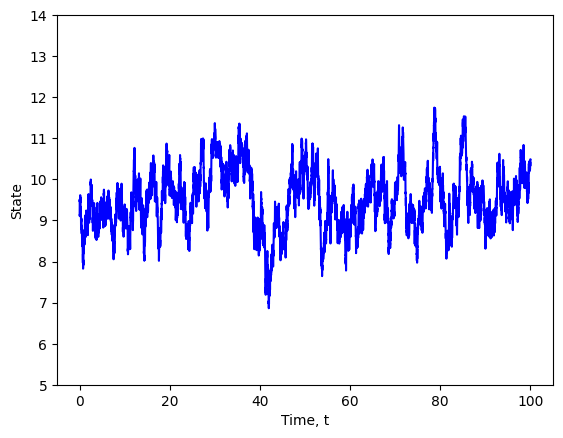

In [5]:
#state vs time high resilience

ts = np.linspace(Tstart,Tend,npoints)
plt.plot(ts,xs,c = 'blue')
plt.xlabel('Time, t')
plt.ylabel('State')
plt.ylim(5,14)

(5.0, 14.0)

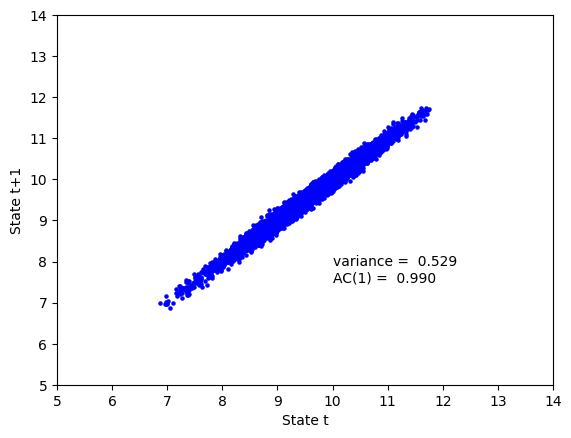

In [6]:
#lag-1 plot high resilience

k = 1
var = np.var(xs)

ac_1 = statsmodels.tsa.stattools.acf(xs-np.mean(xs))[1]


plt.scatter(xs[:npoints-k],xs[k:],s=5,c = 'blue')
plt.xlabel('State t')
plt.ylabel('State t+1')
plt.text(10,7.5,f'variance = {var: .3f}\nAC(1) = {ac_1: .3f}')
plt.xlim(5,14)
plt.ylim(5,14)

In [7]:
c = 2.3                                                                                         #low resilience
sol = scipy.integrate.solve_ivp(lambda t,x: f(x,K,c,t),(0,100),[7.5])
equil = sol.y[0,-1]

In [15]:
Tstart = 0
Tend = 100
npoints = 10000

dt = (Tend - Tstart)/npoints
xs = np.zeros(npoints)
xs[0] = equil

W = np.random.normal(scale=np.sqrt(dt),size=xs.size)
t = 0

for i in tqdm.trange(npoints-1):
    xs[i+1] = xs[i] + f(xs[i],K,c,t)*dt + W[i]

  0%|          | 0/9999 [00:00<?, ?it/s]

100%|██████████| 9999/9999 [00:00<00:00, 418017.36it/s]


(2.0, 11.0)

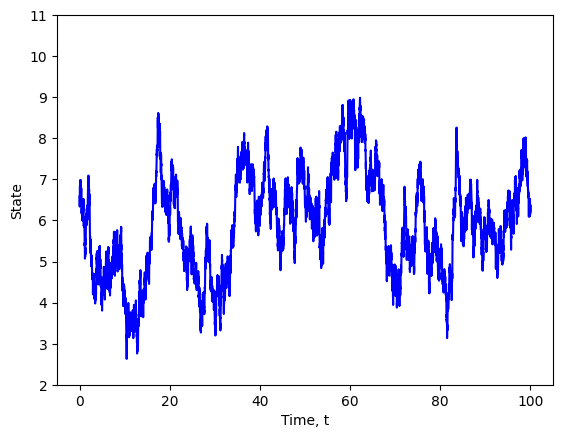

In [16]:
#state vs time low resilience

ts = np.linspace(Tstart,Tend,npoints)
plt.plot(ts,xs,c = 'blue')
plt.xlabel('Time, t')
plt.ylabel('State')
plt.ylim(2,11)

(2.0, 11.0)

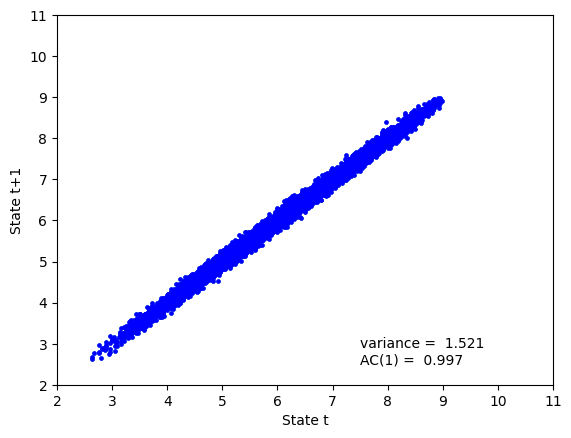

In [17]:
#lag-1 plot low resilience
k = 1
plt.scatter(xs[:npoints-k],xs[k:],s=5)
var = np.var(xs)

ac_1 = statsmodels.tsa.stattools.acf(xs-np.mean(xs))[1]



plt.scatter(xs[:npoints-k],xs[k:],s=5,c = 'blue')
plt.xlabel('State t')
plt.ylabel('State t+1')
plt.text(7.5,2.5,f'variance = {var: .3f}\nAC(1) = {ac_1: .3f}')
plt.xlim(2,11)
plt.ylim(2,11)